# Analysis in Medicare Provider Utilization and Payment Data: From the Prospectives of Average Difference between Submitted and Charged Medicare Amount from Physician in California

## Data Input

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
data = pd.read_csv("medical_insurance.csv")
data.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care discharge,N,23.0,23.0,23.0,72.680000,328.000000,54.502609,55.280870
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99219,Hospital observation care typically 50 minutes,N,18.0,18.0,18.0,135.850000,614.000000,100.958889,102.348889
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99221,"Initial hospital inpatient care, typically 30 ...",N,59.0,58.0,59.0,101.365085,333.288136,79.469661,80.859831
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99222,"Initial hospital inpatient care, typically 50 ...",N,132.0,130.0,132.0,139.010455,356.492424,107.933409,107.969621
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99223,"Initial hospital inpatient care, typically 70 ...",N,220.0,215.0,220.0,205.185955,631.186364,157.908955,160.930409


In [31]:
# subset dataset to only Californa data
data_ca = data.loc[data['State Code of the Provider']=='CA']
display(data_ca.shape)

(731564, 26)

We can see that number of samples are reduced from 9+ millions to 700 thousands. Let's start to dive more into the dataset

## Exploratory Data Analysis

### Missing Value

Since there's small portion of missing values in the remaining columns, these missing values are just dropped out. 

In [32]:
# function to calculate missing value percentage
def get_missing_percentage(column):
    num = column.isnull().sum()
    total_n = len(column)
    return round(num/total_n, 2)

In [33]:
data_ca_drop = data_ca.drop(['Middle Initial of the Provider', 'National Provider Identifier','First Name of the Provider','Credentials of the Provider','Street Address 2 of the Provider','State Code of the Provider','Country Code of the Provider'], axis=1)

In [34]:
data_ca_drop_null = data_ca_drop[data_ca_drop.columns[data_ca_drop.isnull().any()].tolist()]
get_missing_percentage(data_ca_drop_null)

Last Name/Organization Name of the Provider    0.00
Gender of the Provider                         0.06
dtype: float64

Since there's only missing value in gender of the provider with missing at around 6%, therefore missing values were dropped without further imputation. 

In [35]:
data_ca_drop = data_ca_drop.dropna()
data_ca_drop.isnull().sum()

Last Name/Organization Name of the Provider                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average 

Now we don't have any missing value in the dataframe, let's look at more details in this data. First, let's create a column to show the difference between "Avergae submitted Charged Amount" and "Average Medicare Allowed Amount"

In [36]:
data_ca_drop['Average Medicare Difference'] = data_ca_drop['Average Submitted Charge Amount']- data_ca_drop['Average Medicare Allowed Amount'] 

### Subset dataframe based on Provider Type with Top 5 highest Average Medicare Difference  

Let's focus on the top 5 provider types that have the most average medicare difference. 

In [37]:
data_pt_amaa = data_ca_drop.groupby('Provider Type')['Average Medicare Difference'].mean().reset_index().sort_values('Average Medicare Difference', ascending = False).head(5)
data_pt_amaa

,Provider Type,Average Medicare Difference
75,Thoracic Surgery,1192.946294
43,Neurosurgery,1149.126776
6,Cardiac Surgery,1146.053486
79,Vascular Surgery,1042.064660
4,CRNA,882.815789


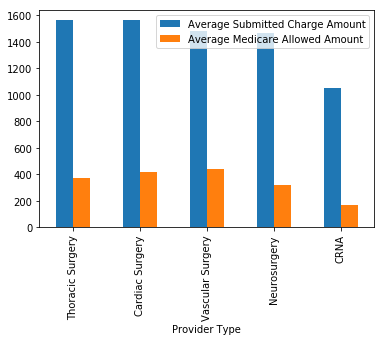

In [38]:
provider_list = ['Thoracic Surgery','Neurosurgery','Cardiac Surgery', 'Vascular Surgery', 'CRNA']
data_ca_drop_pro = data_ca_drop.loc[data_ca_drop['Provider Type'].isin(provider_list)]

# group by provider type and plot bar plot
data_ca_drop_pro.groupby('Provider Type')['Average Submitted Charge Amount','Average Medicare Allowed Amount'].mean().sort_values(by = 'Average Submitted Charge Amount', ascending = False).plot(kind = 'bar')



In [39]:
data_ca_drop_pro.groupby('Provider Type')['Average Medicare Difference'].mean().sort_values(ascending = False)

Provider Type
Thoracic Surgery    1192.946294
Neurosurgery        1149.126776
Cardiac Surgery     1146.053486
Vascular Surgery    1042.064660
CRNA                 882.815789
Name: Average Medicare Difference, dtype: float64

In [40]:
### Top 5 Average Medicare Difference Cities

We may also curious about what would average medicare difference varies among cities, here, we extract top 5 cities that have most average medicare difference:

City of the Provider
WEST HILLS        4544.530351
WILLITS           4189.692122
MARINA DEL REY    3933.719806
INGLEWOOD         3641.784906
LOS ALTOS         3608.698382
Name: Average Medicare Difference, dtype: float64

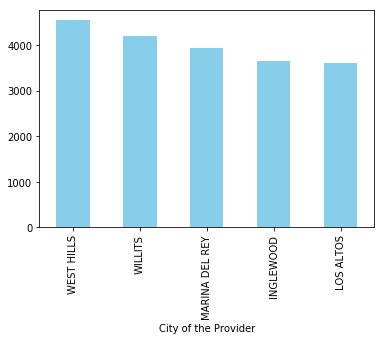

In [41]:
data_ca_drop_pro.groupby('City of the Provider')['Average Medicare Difference'].mean().sort_values(ascending = False).head(5).plot(kind = 'bar', color = 'skyblue')
data_ca_drop_pro.groupby('City of the Provider')['Average Medicare Difference'].mean().sort_values(ascending = False).head(5)

We can see that West Hills has the most difference in average medicare amount, with around $4500 Now, let's subset dataframe based on top 5 provider types.

### ZIPCODE
This section of code is referred from:
https://www.christianpeccei.com/zipmap/

In [69]:
def read_ascii_boundary(filestem):
    '''
    Reads polygon data from an ASCII boundary file.
    Returns a dictionary with polygon IDs for keys. The value for each
    key is another dictionary with three keys:
    'name' - the name of the polygon
    'polygon' - list of (longitude, latitude) pairs defining the main
    polygon boundary
    'exclusions' - list of lists of (lon, lat) pairs for any exclusions in
    the main polygon
    '''
    metadata_file = filestem + 'a.dat'
    data_file = filestem + '.dat'
    # Read metadata
    lines = [line.strip().strip('"') for line in open(metadata_file)]
    polygon_ids = lines[::6]
    polygon_names = lines[2::6]
    polygon_data = {}
    for polygon_id, polygon_name in zip(polygon_ids, polygon_names):
        # Initialize entry with name of polygon.
        # In this case the polygon_name will be the 5-digit ZIP code.
        polygon_data[polygon_id] = {'name': polygon_name}
    del polygon_data['0']
    # Read lon and lat.
    f = open(data_file)
    for line in f:
        fields = line.split()
        if len(fields) == 3:
            # Initialize new polygon
            polygon_id = fields[0]
            polygon_data[polygon_id]['polygon'] = []
            polygon_data[polygon_id]['exclusions'] = []
        elif len(fields) == 1:
            # -99999 denotes the start of a new sub-polygon
            if fields[0] == '-99999':
                polygon_data[polygon_id]['exclusions'].append([])
        else:
            # Add lon/lat pair to main polygon or exclusion
            lon = float(fields[0])
            lat = float(fields[1])
            if polygon_data[polygon_id]['exclusions']:
                polygon_data[polygon_id]['exclusions'][-1].append((lon, lat))
            else:
                polygon_data[polygon_id]['polygon'].append((lon, lat))
    return polygon_data

In [52]:
data_ca_drop_pro['Zip Code of the Provider'] = data_ca_drop_pro['Zip Code of the Provider'].astype('str')
for i in range(data_ca_drop_pro.shape[0]):
    data_ca_drop_pro.loc[i,'Zip Code of the Provider'] = data_ca_drop_pro.loc[i,'Zip Code of the Provider'][:5]

In [53]:
# group by Zip Code of the Provider
provider_zipcode = data_ca_drop_pro.groupby('Zip Code of the Provider')['Average Medicare Difference'].mean().sort_values(ascending = False)

In [105]:
from pylab import *
avg_med_diff = {}

# Add data for each ZIP code
for i in range(provider_zipcode.shape[0]):
    avg_med_diff[provider_zipcode.index[i]] = provider_zipcode[i]
max_avg_med_diff = max(avg_med_diff.values())

6280.06727269


In [74]:
# Read in ZIP code boundaries for California
d = read_ascii_boundary('zip5/zt06_d00')

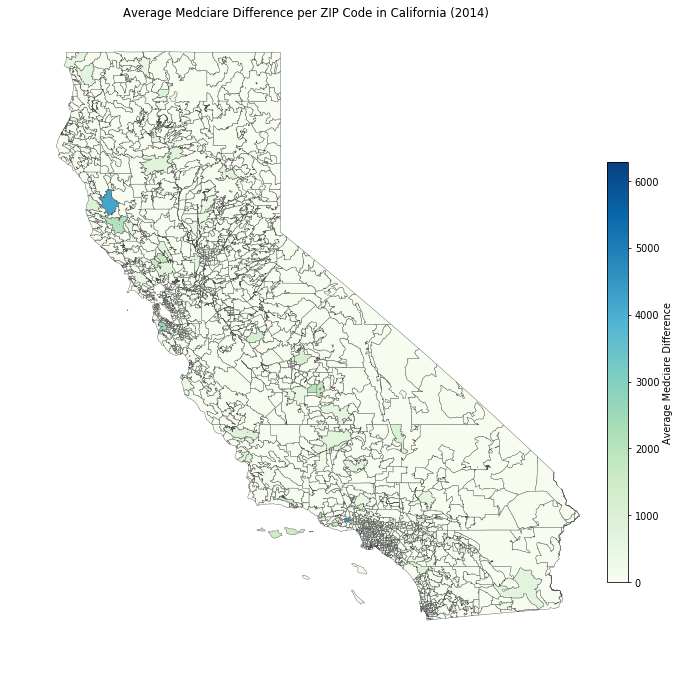

In [133]:
# Create figure and two axes: one to hold the map and one to hold
# the colorbar
figure(figsize=(10, 10), dpi=70)
map_axis = axes([0.0, 0.0, 0.8, 0.9])
cb_axis = axes([0.83, 0.1, 0.03, 0.6])

# Define colormap to color the ZIP codes.
# You can try changing this to cm.Blues or any other colormap
# to get a different effect
cmap = cm.GnBu

# Create the map axis
axes(map_axis)
axis([-125, -114, 32, 42.5])
gca().set_axis_off()

# Loop over the ZIP codes in the boundary file
for polygon_id in d:
    polygon_data = array(d[polygon_id]['polygon'])
    zipcode = d[polygon_id]['name']
    avg_med_diff_mean = avg_med_diff[zipcode] if zipcode in avg_med_diff else 0.
    
    # Define the color for the ZIP code
    fc = cmap(avg_med_diff_mean/max_avg_med_diff)
    
    # Draw the ZIP code
    patch = Polygon(array(polygon_data), facecolor=fc,
        edgecolor=(.3, .3, .3, 1), linewidth=.4)
    gca().add_patch(patch)
title('Average Medciare Difference per ZIP Code in California (2014)')

# Draw colorbar
cb = mpl.colorbar.ColorbarBase(cb_axis, cmap=cmap,
    norm = mpl.colors.Normalize(vmin=0, vmax=max_avg_med_diff))
cb.set_label('Average Medciare Difference')

### Procedures in each Provider Type

In [ ]:
#subset dataframe based on provider type
data_crna = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='CRNA']
data_vas = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Vascular Surgery']
data_cardiac = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Cardiac Surgery']
data_thora = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Thoracic Surgery']
data_neuro = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Neurosurgery']

### Top 10 Procedures in CRNA

In [ ]:
data_crna.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="bar")
data_crna.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

It seems that anesthesia for procedures on hear and great blood vessel cost has the most differences in average medicare amount, which is around $5000 USD. The procedure includes heart-lung usage, re-operation after original procedures. Further details about the frequency of these re-operating procedures and risk factors that contirbute to the re-operation can be discussed. But these questions will be left opened in the project.

### Top 10 Vascular Surgery

In [ ]:
data_vas.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="bar")
data_vas.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

It seems that cost in removal of plaque and insection of stents into artery has the most differences in average medicare amount, which is $23700 USD, followed by the procedures involving removal of plaque and insection of stents into arteriers. We can see that removel of plaque and insection of stents account for top 4 average medicare amount difference procedures in Vascular Surgery. 

### Top 10 Cardiac Surgery 

In [ ]:
data_cardiac.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="bar")
data_cardiac.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

The bar chart shows that insection of vena cava by endovascular approach has the most difference in average medicare amount in cardiac surgery, which is $30700 USD.

### Top 10 Thoracic Surgery 

In [ ]:
data_thora.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="bar")
data_thora.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

The procedures that involves heart surgery shows the most difference between submitted charged amount and allowed medicare amount, which is around $17200 USD. 

### Top 10 Neurosurgery

In [ ]:
data_neuro.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="bar")
data_neuro.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

The largest difference in neruosurgery is the procedure of repairing of bulging of blood vessel in brain, which is around 11520 USD.

### Correlation Heatmap

It is also interested in looking correlations between the variables. So we  

In [ ]:
import seaborn as sns

corr_map = data_ca_drop_pro.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_map, square=True, vmin=-1, vmax=1)

### Creating Dummy Variables

Now, I want to know that what factors would affect the average submitted charge amount. To do so, I need to get dummies for each categorical value to save space and ease computatinal complexity. 

In [ ]:
# convert categorical variable to dummy variable
data_ca_drop_dummy = pd.get_dummies(data_ca_drop_pro[['Zip Code of the Provider','Entity Type of the Provider','Provider Type','Medicare Participation Indicator','HCPCS Description','HCPCS Drug Indicator','City of the Provider']])

In [ ]:
# build continuous variable dataframe
data_ca_drop_continue = data_ca_drop_pro[['Number of Services','Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services','Average Medicare Payment Amount','Average Medicare Standardized Amount','Average Medicare Difference']]

In [ ]:
# normalize continuous dataframe
data_ca_drop_continue = (data_ca_drop_continue-data_ca_drop_continue.min())/(data_ca_drop_continue.max()-data_ca_drop_continue.min())

In [ ]:
# concat binary dataframe and continuous dataframe
data_ca_drop_dummy = pd.concat([data_ca_drop_continue,data_ca_drop_dummy], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
# run lineaqr regression model
Y = data_ca_drop_dummy['Average Medicare Difference']
X = data_ca_drop_dummy.drop(['Average Medicare Difference'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Building a Linear Regression Model

In [ ]:
print (len(x_train))
print (len(y_train))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# create hyperparameter grid
l1_space = np.linspace(0,1,30)
param_grid = {'l1_ratio':l1_space}

#initiate elastic regressor: elastic_net
elastic_net = ElasticNet()

# 10-fold cross validation 
cv_en = GridSearchCV(elastic_net, param_grid, cv = 10)

# training
cv_en.fit(x_train, y_train)

# accuracy
cv_en.best_score_

# Predict
y_pred_en = cv_en.predict(x_test)

# RMSE
print("Elastic Net RMSE: {}".format(mean_squared_error(y_test, y_pred_en)))

# best parameter
print ("Best l1 ratio: {}".format(cv_en.best_params_))

# R squared
print ("Elastic Net R squared: {}".format(cv_en.score(x_tes, y_test)))

In [ ]:
plt.scatter(np.sqrt(y_test), np.sqrt(y_pred_en))
plt.xlabel("True Values")
plt.ylabel("Predictions")

## Lasso Regression

The result from linear regression showed that there's multicollinearity issue. I will use Lasso Regression to reduce the issue. 

In [ ]:
#A helper method for pretty-printing linear models
def get_feature_coef(coefs, names = None):
    
    feature_importance = zip(coefs, names)
    feature_importance = sorted(feature_importance,  key = lambda x:-np.abs(x[0]))
    sig_feature = [(coef, name) for coef, name in feature_importance if coef != 0]
    
    return sig_feature

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Instantiate a lasso regressor
lasso = Lasso()

#lasso alpha parameters
lasso_params = {'alpha':[0.001, 0.01, 0.1, 0.5]} 

lasso_grid = GridSearchCV(lasso, lasso_params, cv = 10, verbose = 10, scoring = 'neg_mean_absolute_error')

# train lasso regressor 
lm_lasso = lasso_grid.fit(x_train, y_train)

print (lm_lasso.best_params_)

Based on the 10-fold cross validation, alpha = 0.5 generate the optimal lasso regressor, so we will use this parameter to build a lasso regressor

In [ ]:
#optimal lasso regressor
lasso = Lasso(alpha = 0.5)

# train lasso regressor 
lm_lasso_opt = lasso.fit(x_train, y_train)

# predict 
y_pred_lasso = lm_lasso_opt.predict(x_test)

# lasso regressor RMSE 
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))


In [ ]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Random Forest Training and Prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# random forest model
rf = RandomForestRegressor(n_estimators = 200, min_samples_leaf = 2, min_samples_split = 15)

# train random forest regressor
rf_model = rf.fit(x_train, y_train)

# Use the forest's predict method on the test data
y_pred_rf = rf.predict(x_test)

# random forest regressor RMSE 
print((np.sqrt(np.mean(y_test - y_pred_rf))))


In [ ]:
# feature importance
rf_feature = rf.feature_importances_ 

In [ ]:
plt.scatter(np.log(y_test), np.log(y_pred_rf))
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Gradient Boosting Machine

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
xgb = XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=1000,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42)
grid = GridSearchCV(xgb, params)
xgb.fit(x_train.values,y_train.values)
y_pred_xgb = xgb.predict(x_test.values)

# feature importance 
xgb_feature = xgb.feature_importances_

In [ ]:
# xgboost regressor RMSE 
print(np.sqrt(np.mean(y_test - y_pred_xgb)))

In [ ]:
# plot prediciton values vs true values 
plt.scatter(np.sqrt(y_test), np.sqrt(y_pred_xgb))
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Neural Netwok

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# import MLP classifier
from sklearn.neural_network import MLPRegressor

# initialize MLP classifier
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30))

# train MLP classifier 
mlp.fit(x_train,y_train)

# predict
y_pred_mlp = mlp.predict(x_test)

# MLP classifier RMSE
print(np.sqrt(np.mean(y_test - y_pred_mlp)))

In [ ]:
# plot prediciton values vs true values 
plt.scatter(np.sqrt(y_test), np.sqrt(y_pred_mlp))
plt.xlabel("True Values")
plt.ylabel("Predictions")

# Stacking 

In [ ]:
### Do combinations of models (stacking)
from sklearn.model_selection import StratifiedKFold
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

# Define K-fold
kf= StratifiedKFold(n_splits=10)

# Change df to np.array
X_= X.values
X_2= X.values
X_3 = X.values
y_= Y.values

# Do k-fold train & evaluate
pred= np.zeros( (2,len(y_)) )
cv = cross_validation.KFold(len(x_train), n_folds=10, shuffle=False, random_state=None)

for traincv, testcv in cv:

    X_train, X_test= (X_[traincv], X_[testcv])
    X_train2, X_test2= (X_2[traincv], X_2[testcv])
    #X_train3, X_test3 = (X_3[traincv], X_3[testcv])
    y_train, y_test= (y_[traincv], y_[testcv])

    # XGB
#     xgb= XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
#                              learning_rate=0.05, max_depth=6, 
#                              min_child_weight=1.5, n_estimators=1000,
#                              reg_alpha=0.9, reg_lambda=0.6,
#                              subsample=0.2,seed=42)
#     xgb.fit(X_train,y_train)
#     pred[0,testcv]= xgb.predict(X_test)
    
    # MLP classifier
    mlp = MLPRegressor(hidden_layer_sizes=(30,30,30))
    mlp.fit(X_train,y_train)
    pred[1,testcv]= mlp.predict(X_test)[:,1]
    
    #random forest regressor
    rf = RandomForestRegressor(n_estimators = 500, min_samples_leaf = 2, min_samples_split = 15)
    rf_model = rf.fit(X_train2, y_train)
    pred[2,testcv]= rf.predict(X_test2)[:,1]
    


In [ ]:
def log_loss(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -(y_true * np.log(y_pred)).sum(axis=1).mean()

In [ ]:
from sklearn.metrics import log_loss

results= {}
for i in range(20):
    for j in range(20, 0, -1):
        coeff1= i * 0.05
        coeff2= j * 0.05
        pred_combined= coeff1*pred[0,:]+coeff2*pred[1,:]

        # log loss
        score= np.sqrt(np.mean(y_[:,1] - pred_combined))
        # accuracy 
        #score= accuracy_score(y_,np.round(pred_combined))

        results[(coeff1,coeff2)]= score

# get optimal combination coefficients
for coeffs, score in sorted(results.items(), key= lambda x: x[1]):
    print(coeffs, score)
    

In [ ]:
# Verified combination coefficients
coeff_mlp= 0.5
coeff_rf= 0.5

# Making prediction
pred_mlp= mlp.predict(X_test)[:,1]
pred_rf= rf.predict(X_test2)[:,1]
stack_pred= coeff_mlp*pred_mlp + coeff_rf*pred_rf

# Stacking RMSE
print (np.sqrt(np.mean(np.power(y_test[:,1]-stack_pred,2))))

In [ ]:
# plot prediciton values vs true values 
plt.scatter(np.log(y_test[:,1]), np.log(stack_pred))
plt.xlabel("True Values")
plt.ylabel("Predictions")

As the result, the best model is to use stacking by combing random forest regressor and MLP regressor. 